**Họ và tên: Võ Hoàng Thông </br>
MSSV: 18521462 </br>
Lab 07**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

path = "/content/drive/My Drive"
os.chdir(path)
%cd Colab Notebooks/DS105

/content/drive/My Drive/Colab Notebooks/DS105


**Câu 1. Tạo dataframe (df) lưu trữ dataset tại đường dẫn trên. Xuất 5 samples đầu tiên. Dataset có bao nhiêu sample, số lượng bao nhiêu feature.**

In [4]:
import pandas as pd
import io
from io import BytesIO
from urllib.request import Request, urlopen
link = 'https://github.com/datasethub/ds105/blob/master/Canada.xlsx?raw=true'
url = Request(link, headers={'User-Agent': 'Mozilla/5.0'})
df = pd.read_excel(BytesIO(urlopen(url).read()), sheet_name='Canada by Citizenship (2)', skipfooter=2)
df.head(5)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [5]:
df.iloc[0:1]['AREA']

0    935
Name: AREA, dtype: int64

In [6]:
print("Số sample và feature của dataframe: ", df.shape[0], " và ",df.shape[1])

Số sample và feature của dataframe:  194  và  43


**Câu 2. Đổi tên các column thành tên mới như sau: columns={'OdName':'Country, 'AreaName': 'Continent', 'RegName':'Region'}. Sau đó loại bỏ các column ['AREA','REG','DEV','Type','Coverage'] ra khỏi dataset.**

In [7]:
df = df.rename(columns={'OdName':'Country', 'AreaName': 'Continent', 'RegName':'Region'})
df = df.drop(['AREA','REG','DEV','Type','Coverage'], axis=1)

**Câu 3. Tạo thêm cột 'Total' trong dataset, lưu trữ tổng số người từ năm 1980 đến 2013 của từng quốc gia.**

In [8]:
def process_total_atributes(row):
    total_people = 0
    for year in range(1980, 2014):
        total_people = total_people + row[year]
    return total_people

In [9]:
df['Total'] = df.apply(process_total_atributes, axis = 1)

In [10]:
df.sort_values(by=['Total'])

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
131,Palau,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
109,Marshall Islands,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2
191,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2
123,New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,2,5
149,San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
136,Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,12509,12718,13670,20479,19532,15864,13692,11549,8735,9734,10763,13836,11707,12758,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
183,United Kingdom of Great Britain and Northern I...,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,31668,23380,34123,33720,39231,30145,29322,22965,10367,7045,8840,11728,8046,6797,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
36,China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962


**Câu 4. Chuyển đổi các giá trị trong cột Country thành index của dòng.**

In [11]:
df = df.set_index('Country')

**Câu 5. Gọi biến years lưu trữ thông tin các cột của các năm từ 1980 đến năm 2013 (years=[1980, 1981, .., 2013]. Thiết kế các cách truy vấn trả về một dataframe với input là một country bất kỳ.**

In [12]:
def df_country(country, years):
    return df.loc[country, years]

In [13]:
years = [year for year in range(1980, 2014)]    

In [14]:
df_country(country = 'Albania', years = years)

1980       1
1981       0
1982       0
1983       0
1984       0
1985       0
1986       1
1987       2
1988       2
1989       3
1990       3
1991      21
1992      56
1993      96
1994      71
1995      63
1996     113
1997     307
1998     574
1999    1264
2000    1816
2001    1602
2002    1021
2003     853
2004    1450
2005    1223
2006     856
2007     702
2008     560
2009     716
2010     561
2011     539
2012     620
2013     603
Name: Albania, dtype: object

**Câu 6. Tạo plot thể hiện số lượng di cư (sự biến động, diễn biến) của Haiti và Japan đến Canada từ năm 1980 đến 2013.**

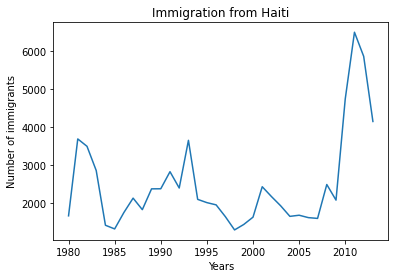

In [15]:
import matplotlib.pyplot as plt
years = [year for year in range(1980, 2014)]
df.loc['Haiti', years].plot(kind = 'line')
plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.show()

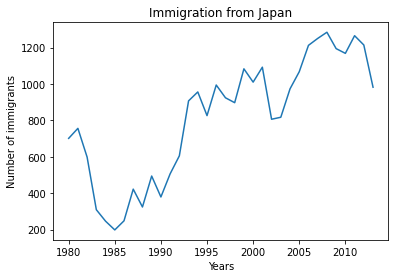

In [16]:
import matplotlib.pyplot as plt
years = [year for year in range(1980, 2014)]
df.loc['Japan', years].plot(kind = 'line')
plt.title('Immigration from Japan')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.show()

**Câu 7. Tạo plot mô tả xu hướng nhập cư của năm quốc gia có tỷ lệ nhập cư cao nhất vào Canada từ năm 1980 đến 2013.**

In [17]:
df_top5 = df.sort_values(ascending = False, by=['Total']).head(5)
df_top5 = df_top5[years].transpose()

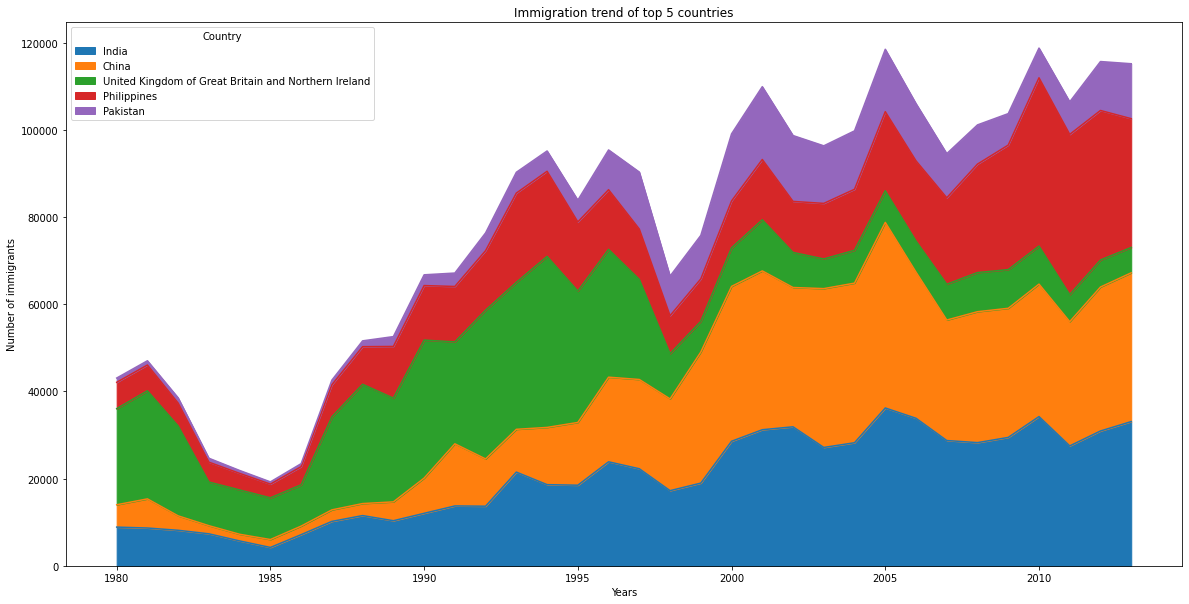

In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt
df_top5.plot(kind = 'area', figsize=(20,10))
plt.title('Immigration trend of top 5 countries')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.show()

**Câu 8. Tạo plot mô tả xu hướng nhập cư của năm quốc gia có tỷ lệ nhập cư thấp nhất vào Canada từ năm 1980 đến 2013.**

In [19]:
df_down5 = df.sort_values(ascending = True, by=['Total']).head(5)
df_down5 = df_down5[years].transpose()

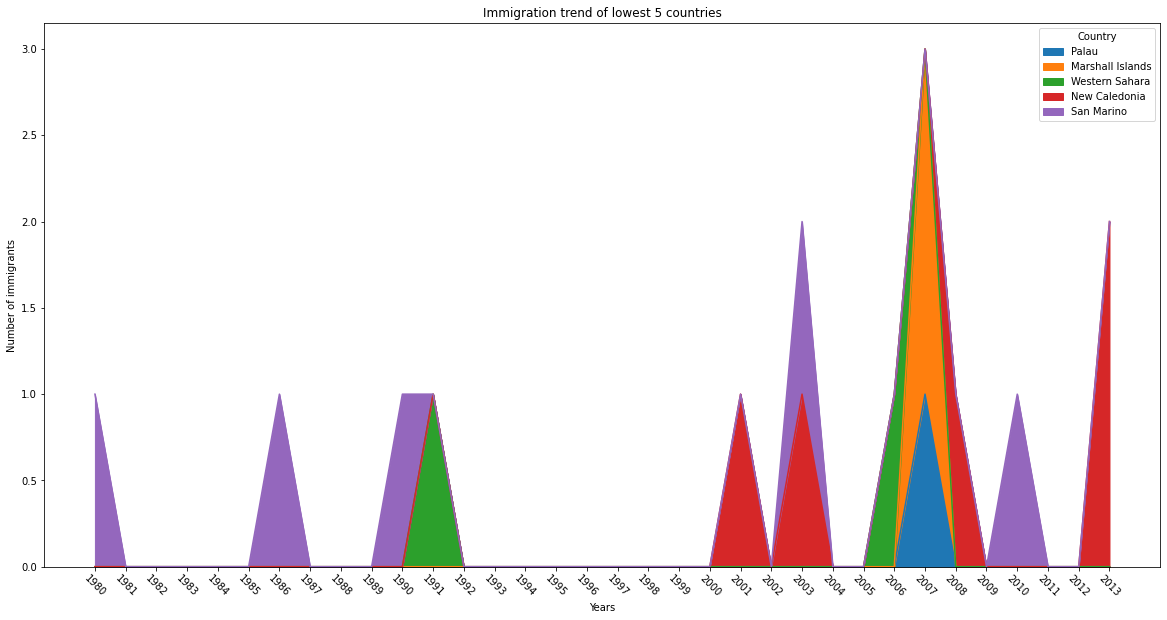

In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt
df_down5.plot(kind = 'area', figsize=(20,10))
plt.title('Immigration trend of lowest 5 countries')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.xticks(df.loc['Haiti'][3:-1].index.tolist(),rotation=-45)
plt.show()

**Câu 9. Tạo các plot thể hiện tần suất di cư của các nước đến Canada cho từng năm 2010, 2011, 2012 và 2013. Nhận xét gì tần suất di cư đến Canada của các năm đó.**

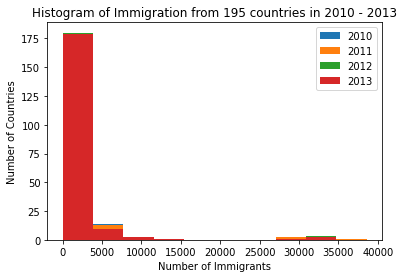

In [21]:
df[[2010, 2011, 2012, 2013]].plot(kind = 'hist')
plt.title('Histogram of Immigration from 195 countries in 2010 - 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')
plt.show()

**Nhận xét:** Tần suất di cư của các nước đến Canada vào năm 2013 có sự tăng đột biến so với các năm trước đó.

**Câu 10. Tạo các plot thể hiện tỉ lệ nhập cư của mỗi lục địa vào Canada từ năm 1980 đến 2013.**

In [22]:
df_continents = df.groupby('Continent', axis = 0).sum()

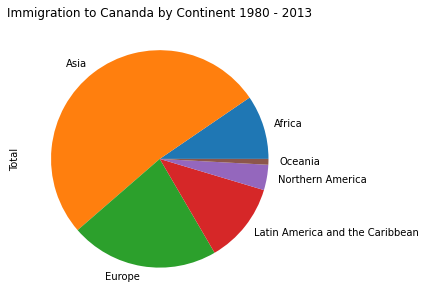

In [23]:
df_continents['Total'].plot(kind = 'pie', figsize = (10,5))
plt.title('Immigration to Cananda by Continent 1980 - 2013')
plt.show()

**Câu 11. Tạo các connection map thể hiện quá trình nhập cư của các lục địa đến Canada cho các năm 2010, 2011, 2012 và 2013.**

In [28]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Safari/537.36")
location = geolocator.geocode("Canada")
print((location.latitude, location.longitude))

(61.0666922, -107.9917071)


In [26]:
import folium

In [27]:
world_map = folium.Map(
    location = [56.130, -106.35],
    zoom_start = 1
)
world_map